In [1]:
#!/usr/bin/env python

# Copyright (C) 2024 Susanna M. Green and Andrew P. Lundgren 

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
#Define directory of the input and output files 
DATA_DIR = '/users/sgreen/gwtuna/'

In [4]:
#Key Results
GWtuna_popsize50 = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize50 = pd.read_csv(GWtuna_popsize50)

GWtuna_popsize50_failed = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize50_failed = pd.read_csv(GWtuna_popsize50_failed)

#Population Data
GWtuna_popsize25 = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR25ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize25 = pd.read_csv(GWtuna_popsize25)

GWtuna_popsize25_failed = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR25ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize25_failed = pd.read_csv(GWtuna_popsize25_failed)

GWtuna_popsize75 = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR75ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize75 = pd.read_csv(GWtuna_popsize75)

GWtuna_popsize75_failed = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR75ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize75_failed = pd.read_csv(GWtuna_popsize75_failed)

#Bi-population
GWtuna_bipop = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR50bipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_bipop = pd.read_csv(GWtuna_bipop)

GWtuna_bipop_failed = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR50bipopincpopsize2Callback500FinalFailed.csv'
GWtuna_bipop_failed = pd.read_csv(GWtuna_bipop_failed)

#Learning Rate Data
GWtuna_popsize50_noLR = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler900050ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize50_noLR = pd.read_csv(GWtuna_popsize50_noLR)

GWtuna_popsize50_noLR_failed = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler900050ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize50_noLR_failed = pd.read_csv(GWtuna_popsize50_noLR_failed)

#Mass and Spin Data
GWtuna_popsize50_mass = DATA_DIR+r'GWtunaMassSpinO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize50_mass = pd.read_csv(GWtuna_popsize50_mass)

GWtuna_popsize50_mass_failed = DATA_DIR+r'GWtunaMassSpinO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize50_mass_failed = pd.read_csv(GWtuna_popsize50_mass_failed)

#Mchirp, Eta and Spin Data
GWtuna_popsize50_mchirp = DATA_DIR+r'GWtunaMchirpEtaO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize50_mchirp = pd.read_csv(GWtuna_popsize50_mchirp)

GWtuna_popsize50_mchirp_failed = DATA_DIR+r'GWtunaMchirpEtaO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize50_mchirp_failed = pd.read_csv(GWtuna_popsize50_mchirp_failed)

In [5]:
GWtuna_popsize75_failed.head()

,lambda0,eta,chi1,chi2,snr,predicted_lambda0,predicted_eta,predicted_spin1,predicted_spin2,predicted_snr,TPE
0,0.972871,0.243512,0.012328,0.042740,6.232331,0.969702,0.240741,0.006431,0.031404,5.974672,10.845570
1,0.432586,0.223924,0.003364,0.021584,5.707967,0.815215,0.238022,-0.038714,-0.029443,5.964829,12.724765
2,0.598759,0.237750,0.019336,0.041138,5.359554,0.826395,0.240222,-0.036982,-0.005712,5.993712,19.405094
3,0.582213,0.240241,0.005040,0.038719,6.537299,0.440746,0.246255,0.047399,-0.001847,5.992533,11.013758
4,0.701180,0.249605,-0.043015,-0.019671,5.649650,0.911353,0.240274,0.015096,-0.005512,5.991394,11.382552


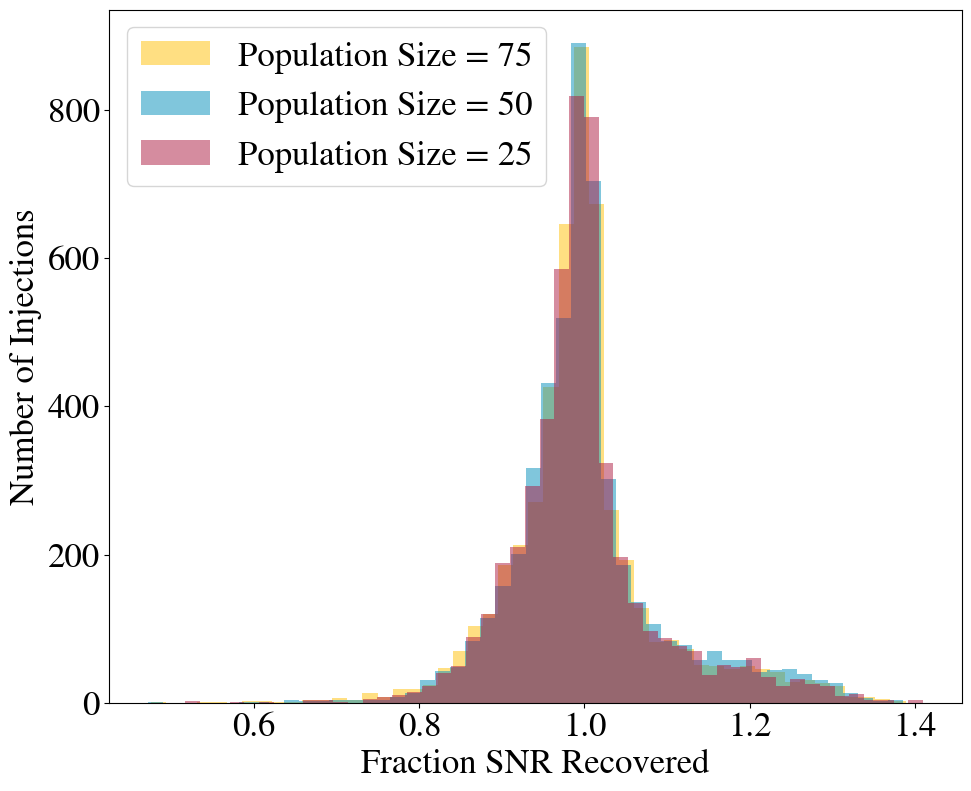

In [6]:
error_popsize25 = GWtuna_popsize25['snr'] - GWtuna_popsize25['predicted_snr']
error_popsize50 = GWtuna_popsize50['snr'] - GWtuna_popsize50['predicted_snr']
error_popsize75 = GWtuna_popsize75['snr'] - GWtuna_popsize75['predicted_snr']
fraction_snr_popsize25 = GWtuna_popsize25['predicted_snr']/GWtuna_popsize25['snr']
fraction_snr_popsize50 = GWtuna_popsize50['predicted_snr']/GWtuna_popsize50['snr']
fraction_snr_popsize75 = GWtuna_popsize75['predicted_snr']/GWtuna_popsize75['snr']

plt.figure(figsize=(11, 9))
plt.hist(fraction_snr_popsize75, bins=50, alpha=0.5,  color='#FFC107', label='Population Size = 75')
plt.hist(fraction_snr_popsize50, bins=50, alpha=0.5, color='#038fba', label='Population Size = 50')
plt.hist(fraction_snr_popsize25, bins=50, alpha=0.5, color='#AD1A41', label='Population Size = 25')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend()
plt.savefig(DATA_DIR+'Final_PopulationSize.png', dpi=300, bbox_inches='tight')

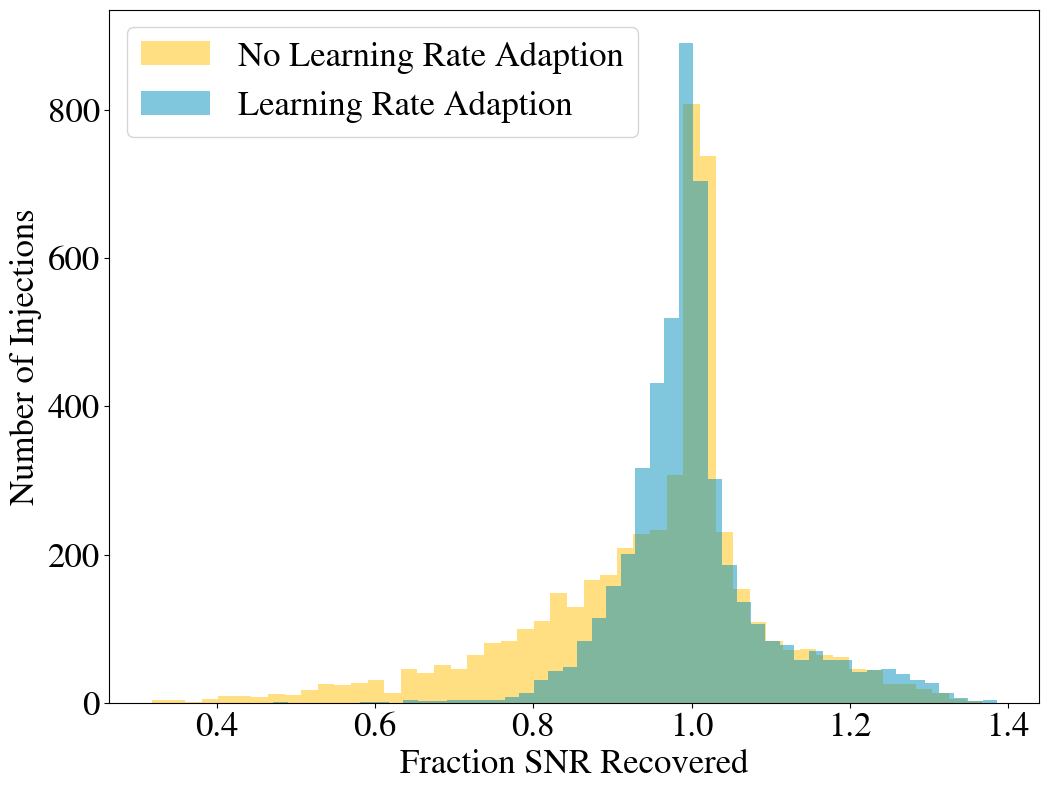

In [7]:
GWtuna_popsize50_noLR_error = GWtuna_popsize50_noLR['snr'] - GWtuna_popsize50_noLR['predicted_snr']
fraction_snr_popsize50_noLR = GWtuna_popsize50_noLR['predicted_snr']/GWtuna_popsize50_noLR['snr']

plt.figure(figsize=(12, 9))
plt.hist(fraction_snr_popsize50_noLR, bins=50, alpha=0.5, color='#FFC107', label='No Learning Rate Adaption')
plt.hist(fraction_snr_popsize50, bins=50, alpha=0.5, color='#038fba', label='Learning Rate Adaption')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend()
plt.savefig(DATA_DIR+'Final_LearningRate.png', dpi=300, bbox_inches='tight')

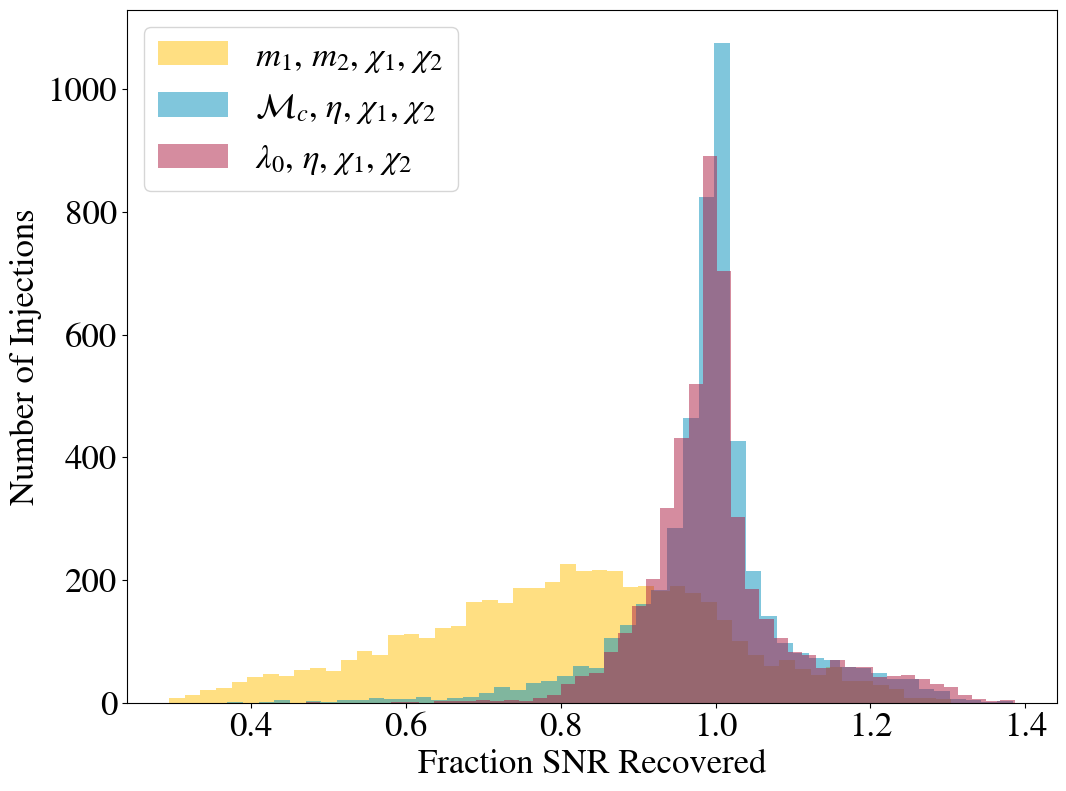

In [8]:
GWtuna_popsize50_mass_error = GWtuna_popsize50_mass['snr'] - GWtuna_popsize50_mass['predicted_snr']
fraction_snr_popsize50_mass = GWtuna_popsize50_mass['predicted_snr']/GWtuna_popsize50_mass['snr']

GWtuna_popsize50_mchirp_error = GWtuna_popsize50_mchirp['snr'] - GWtuna_popsize50_mchirp['predicted_snr']
fraction_snr_popsize50_mchirp = GWtuna_popsize50_mchirp['predicted_snr']/GWtuna_popsize50_mchirp['snr']

plt.figure(figsize=(12, 9))
plt.hist(fraction_snr_popsize50_mass, bins=50, alpha=0.5, color='#FFC107', label='$m_{1}$, $m_{2}$, $\chi_{1}$, $\chi_{2}$')
plt.hist(fraction_snr_popsize50_mchirp, bins=50, alpha=0.5, color='#038fba', label='$\mathcal{M}_{c}$, $\eta$, $\chi_{1}$, $\chi_{2}$')
plt.hist(fraction_snr_popsize50, bins=50, alpha=0.5, color='#AD1A41', label='$\lambda_{0}$, $\eta$, $\chi_{1}$, $\chi_{2}$')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend()
plt.savefig(DATA_DIR+'Final_Mass_MChirp_Lambda0.png', dpi=300, bbox_inches='tight')

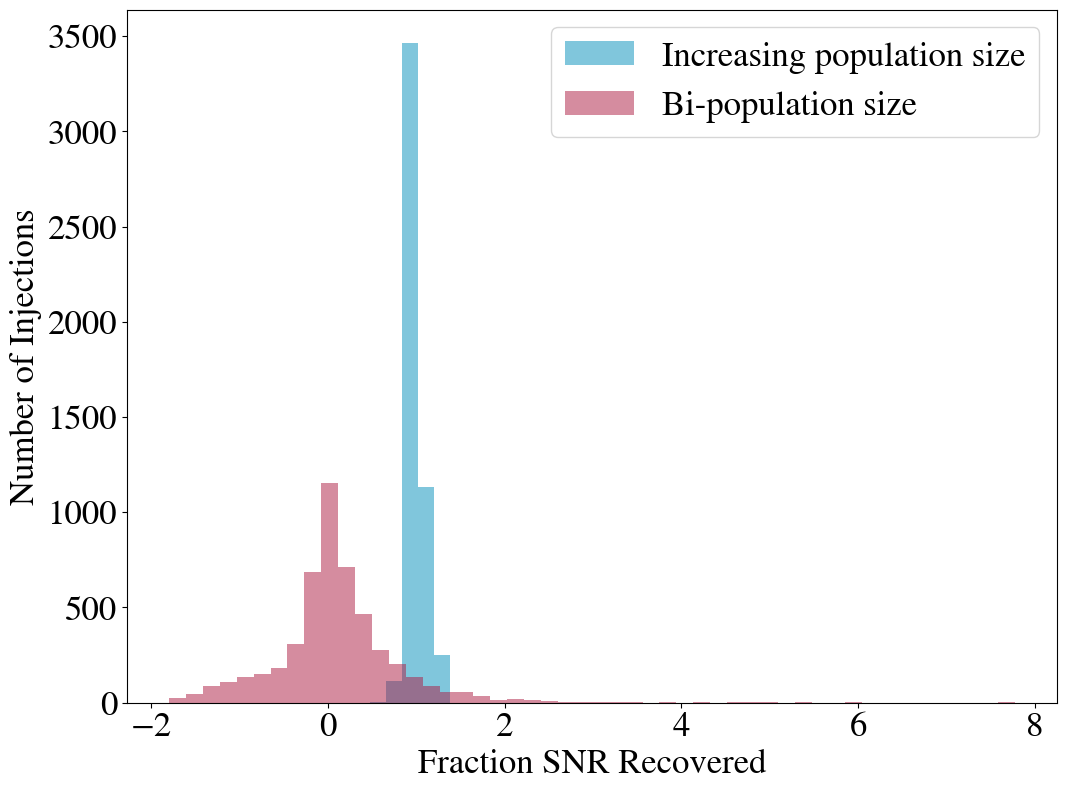

In [9]:
GWtuna_GWtuna_bipop = GWtuna_bipop['snr'] - GWtuna_bipop['predicted_snr']
fraction_snr_GWtuna_bipopp = GWtuna_bipop['predicted_snr']/GWtuna_bipop['snr']

plt.figure(figsize=(12, 9))
plt.hist(fraction_snr_popsize50, bins=5, alpha=0.5, color='#038fba', label='Increasing population size')
plt.hist(GWtuna_GWtuna_bipop, bins=50, alpha=0.5, color='#AD1A41', label='Bi-population size')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend()
plt.savefig(DATA_DIR+'Final_Bipop.png', dpi=300, bbox_inches='tight')

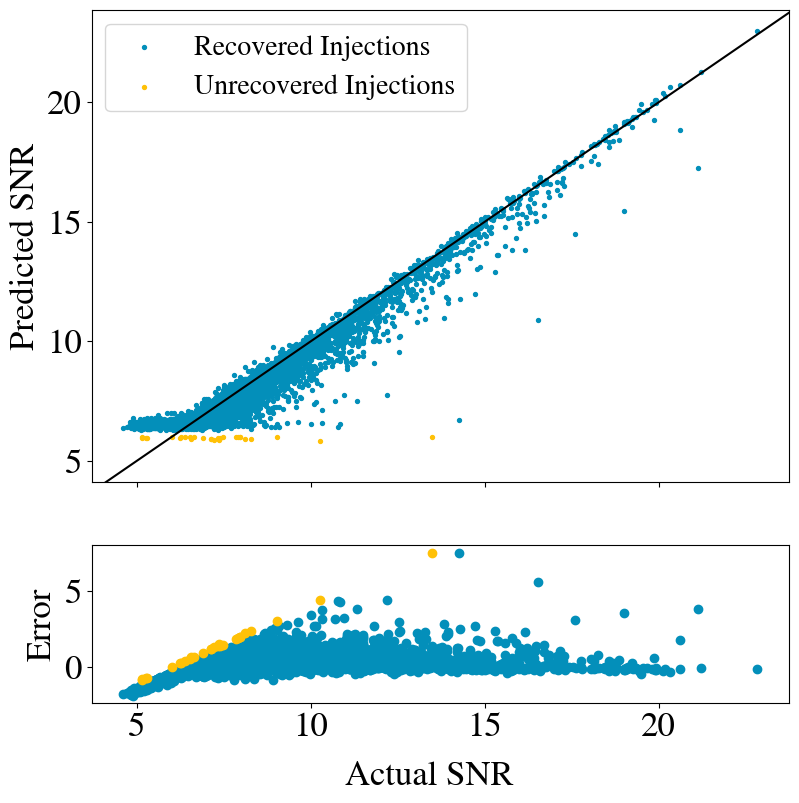

In [10]:
error_popsize50_failed_error = GWtuna_popsize50_failed['snr'] - GWtuna_popsize50_failed['predicted_snr']

fig, (ax1, ax2) = plt.subplots(2, figsize=(9, 9), sharex=True, height_ratios=[3, 1])
ax1.scatter(GWtuna_popsize50['snr'], GWtuna_popsize50['predicted_snr'], s=8, color='#038fba', label='Recovered Injections')
ax1.scatter(GWtuna_popsize50_failed['snr'], GWtuna_popsize50_failed['predicted_snr'], s=8, color='#FFC107', label='Unrecovered Injections')
ax1.axline((5, 5), slope=1, color='k')
ax1.set_ylabel('Predicted SNR')
ax1.legend(loc='upper left', fontsize=20)

ax2.scatter(GWtuna_popsize50['snr'], error_popsize50, color = '#038fba')
ax2.scatter(GWtuna_popsize50_failed['snr'], error_popsize50_failed_error, color = '#FFC107')
ax2.set_ylabel('Error')

fig.supxlabel('Actual SNR', fontsize=25)
plt.savefig(DATA_DIR+'Final_Injected_recovered_SNR.png', dpi=300, bbox_inches='tight')

In [11]:
print(f'TPE failed to recover {len(GWtuna_popsize50_failed)} injections, with values:')
print(np.array(GWtuna_popsize50_failed['snr'].values))

TPE failed to recover 28 injections, with values:
[13.4859605   5.15398381  7.90802299  7.39730334 10.25853588  9.03950194
  8.12627334  6.01556525  7.97945412  7.49224529  6.23571989  5.14839377
  7.12845112  7.14699288  8.29161659  6.90669949  7.38123073  6.52482495
  6.5748104   7.34480853  6.26731939  6.65722771  6.39902021  5.27571659
  7.21822777  7.84796485  7.97378741  5.29021379]


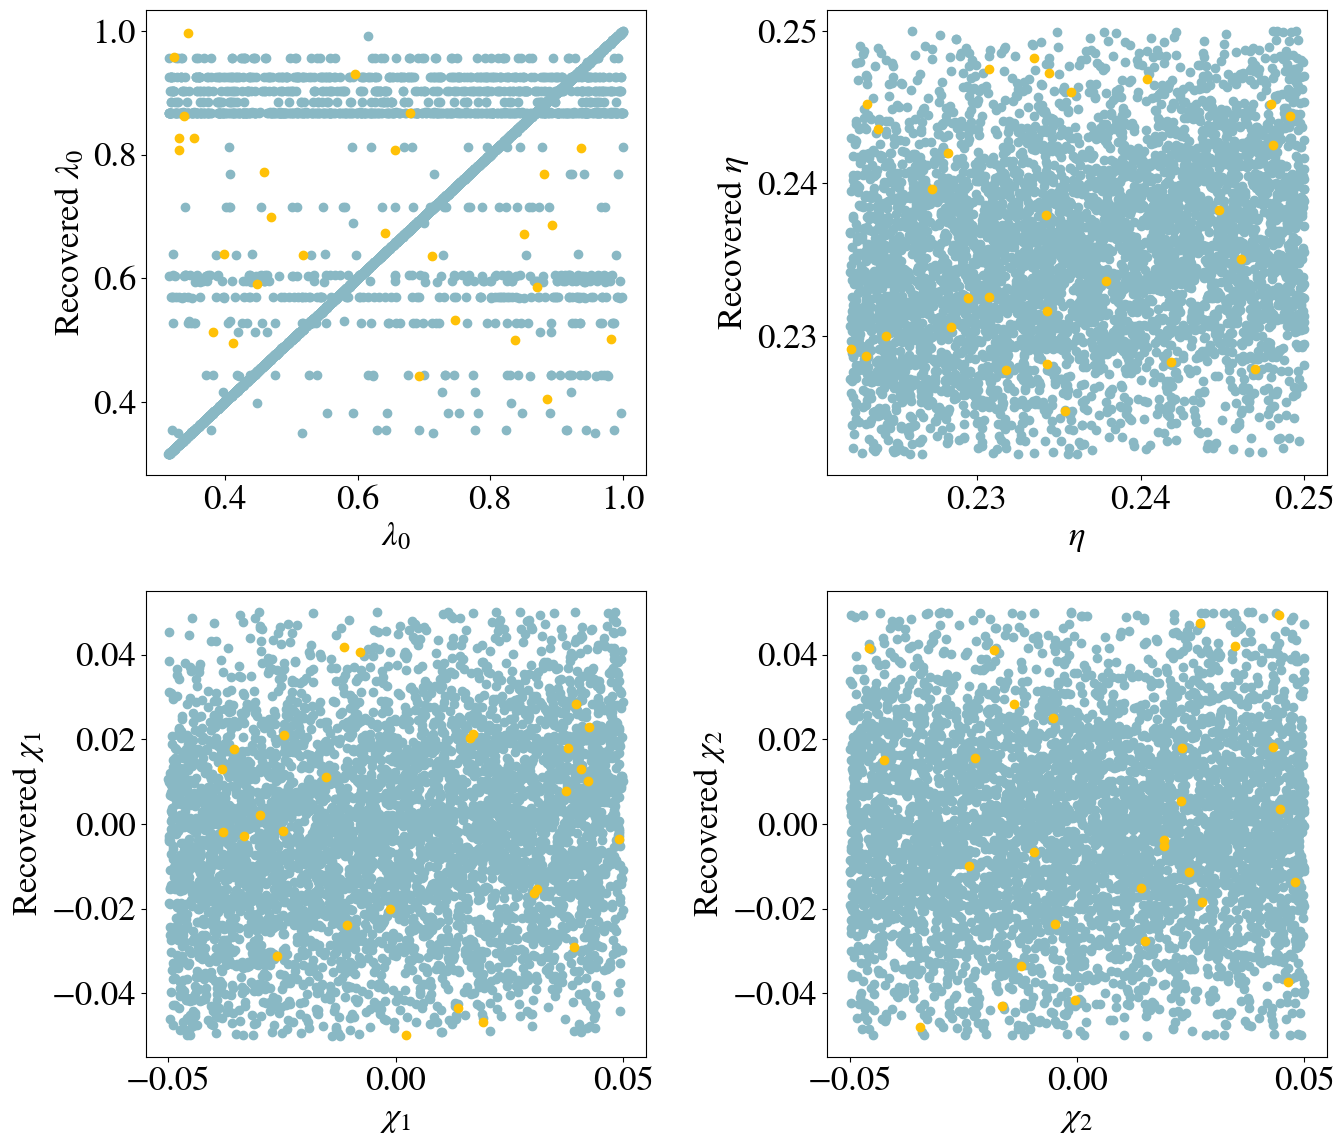

In [12]:
fig = plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.scatter(GWtuna_popsize50['lambda0'], GWtuna_popsize50['predicted_lambda0'], color='#89b8c4')
plt.scatter(GWtuna_popsize50_failed['lambda0'], GWtuna_popsize50_failed['predicted_lambda0'], color='#FFC107')
plt.xlabel('$\lambda_{0}$')
plt.ylabel('Recovered $\lambda_{0}$')

plt.subplot(2, 2, 2)
plt.scatter(GWtuna_popsize50['eta'],  GWtuna_popsize50['predicted_eta'], color='#89b8c4')
plt.scatter(GWtuna_popsize50_failed['eta'], GWtuna_popsize50_failed['predicted_eta'], color='#FFC107')
plt.xlabel('$\eta$')
plt.ylabel('Recovered $\eta$')

plt.subplot(2, 2, 3)
plt.scatter(GWtuna_popsize50['chi1'], GWtuna_popsize50['predicted_spin1'], color='#89b8c4')
plt.scatter(GWtuna_popsize50_failed['chi1'], GWtuna_popsize50_failed['predicted_spin1'], color='#FFC107')
plt.xlabel('$\chi_{1}$')
plt.ylabel('Recovered $\chi_{1}$')

plt.subplot(2, 2, 4)
plt.scatter(GWtuna_popsize50['chi2'],  GWtuna_popsize50['predicted_spin2'], color='#89b8c4')
plt.scatter(GWtuna_popsize50_failed['chi2'], GWtuna_popsize50_failed['predicted_spin2'], color='#FFC107')
plt.xlabel('$\chi_{2}$')
plt.ylabel('Recovered $\chi_{2}$')

plt.tight_layout() 
plt.savefig(DATA_DIR+'Final_param_error.png', dpi=300, bbox_inches='tight')

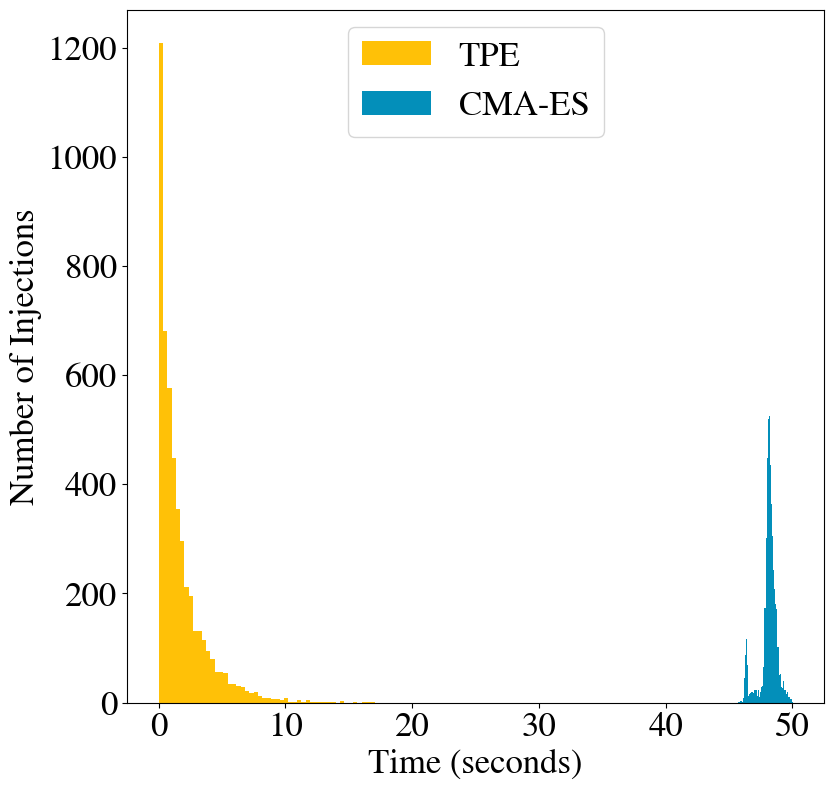

In [13]:
plt.figure(figsize=(9, 9))
plt.hist(GWtuna_popsize50['TPE'], bins=50, color='#FFC107', label='TPE')
plt.hist(GWtuna_popsize50['CMAES'], bins=50, color='#038fba', label='CMA-ES')
plt.ylabel('Number of Injections')
plt.xlabel('Time (seconds)')
plt.legend(loc = 'upper center')
plt.savefig(DATA_DIR+'Final_TPE_CMAES_time.png', dpi=300, bbox_inches='tight')

In [14]:
print(f'The median time taken for TPE')
print(np.median(GWtuna_popsize50['TPE']))

The median time taken for TPE
1.032862663269043


In [15]:
print(f'The median time taken for CMA-ES')
print(np.median(GWtuna_popsize50['CMAES']))

The median time taken for CMA-ES
48.20419001579285


In [16]:
GWtuna_popsize50_reduced_snr = GWtuna_popsize50['snr'][GWtuna_popsize50['snr'] > 8]
GWtuna_popsize50_reduced_predicted_snr = GWtuna_popsize50['predicted_snr'][GWtuna_popsize50['snr'] > 8]

fraction_snr_popsize50_reduced = GWtuna_popsize50_reduced_predicted_snr/GWtuna_popsize50_reduced_snr

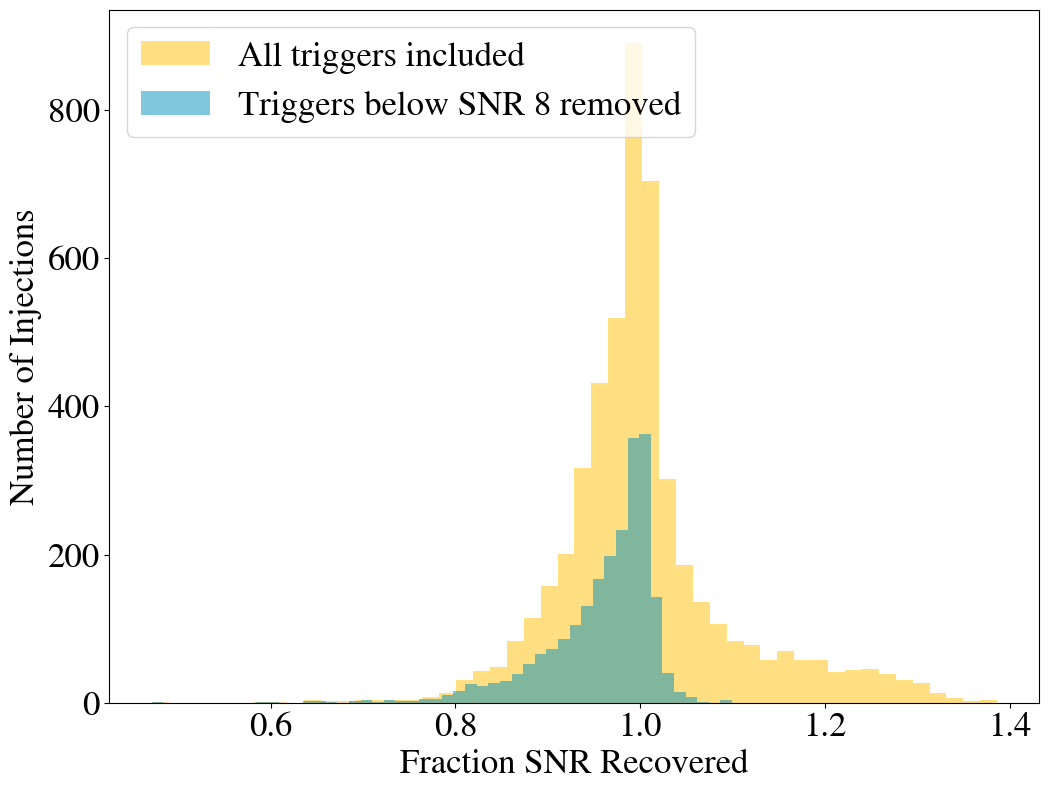

In [17]:
plt.figure(figsize=(12, 9))
plt.hist(fraction_snr_popsize50, bins=50, alpha=0.5, color='#FFC107', label='All triggers included')
plt.hist(fraction_snr_popsize50_reduced, bins=50, alpha=0.5, color='#038fba', label='Triggers below SNR 8 removed')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend(loc='upper left')
plt.savefig(DATA_DIR+'Final_Threshold_Investigation.png', dpi=300, bbox_inches='tight')